**`Generating Dataset using Numpy`**

In [0]:
import numpy as np

Samples = 100
np.random.seed(0) 
x = 2 - 3 * np.random.normal(0, 1, Samples)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, Samples)

**Converting dataset into torch tensors and reshaping them**

In [0]:
import torch
X_Set = torch.tensor(x)
Y_Set = torch.tensor(y)
X_Set = X_Set.reshape(-1,)
Y_Set = Y_Set.reshape(-1,)

**Plotting Generated Dataset**

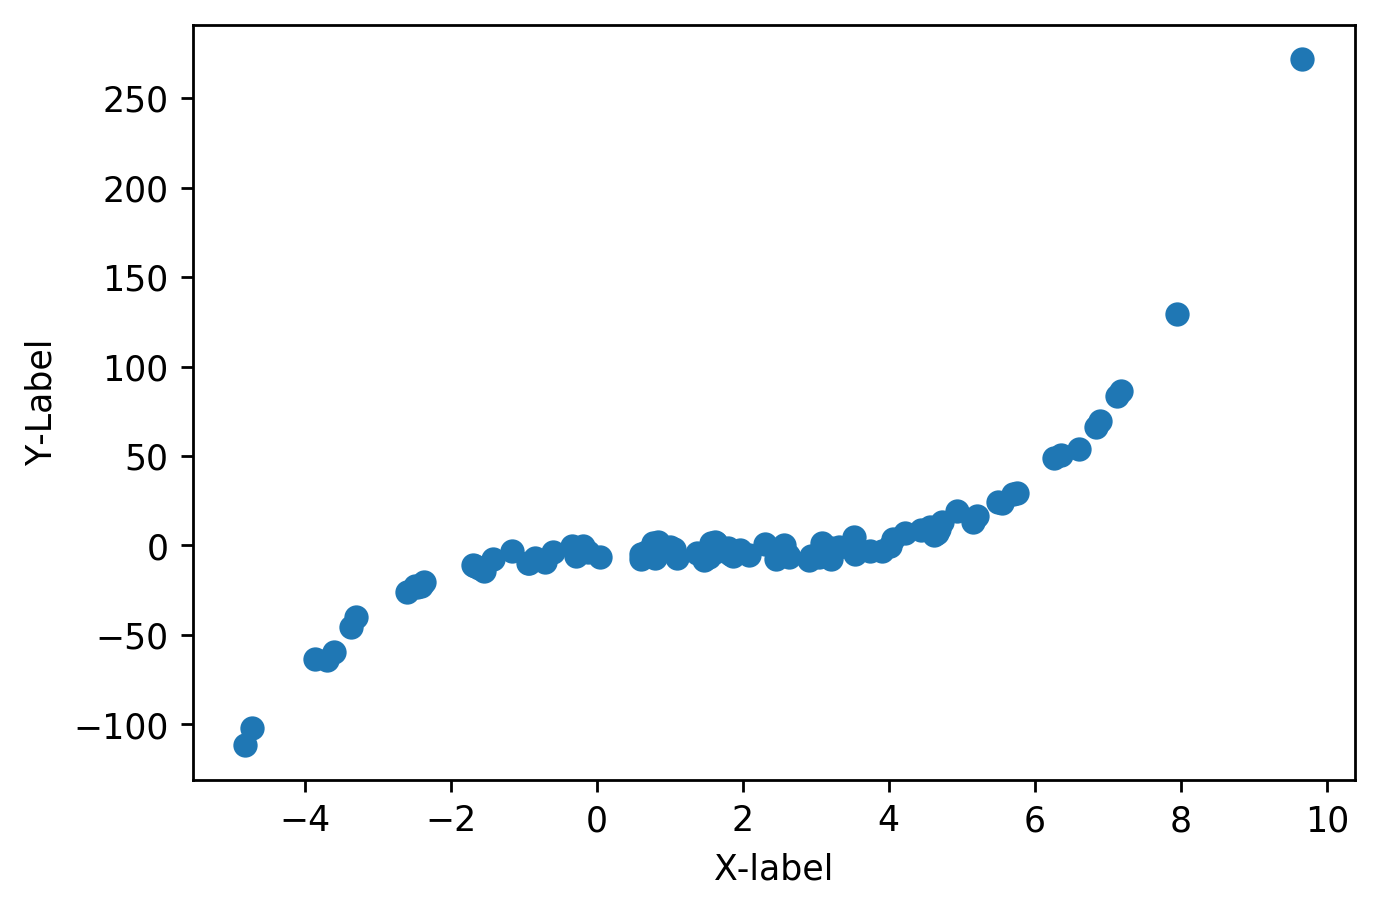

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=250)
plt.xlabel("X-label")
plt.ylabel("Y-Label")
plt.plot(X_Set.numpy(), Y_Set.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")

**Defining the Model, Loss Function, Gradient Update Function and Training Loop**

In [0]:
def model(X, w, b):
    return w * X + b

def loss_fn(P, Y):
    squared_diffs = (P - Y)**2
    return squared_diffs.mean()

def dloss_fn(P, Y):
    dsq_diffs = 2 * (P - Y) / P.size(0)  
    return dsq_diffs

def dmodel_dw(X, w, b):
    return X

def dmodel_db(X, w, b):
    return 1.0

def grad_fn(X, Y, P, w, b):
    dloss_dtp = dloss_fn(P, Y)
    dloss_dw = dloss_dtp * dmodel_dw(X, w, b)
    dloss_db = dloss_dtp * dmodel_db(X, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  

def training_loop(n_epochs, learning_rate, params, X, Y):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        P = model(X, w, b)  
        loss = loss_fn(P, Y)
        grad = grad_fn(X, Y, P, w, b)  

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) 
            
    return params

def training_loop(n_epochs, learning_rate, params, X, Y, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        P = model(X, w, b)  
        loss = loss_fn(P, Y)
        grad = grad_fn(X, Y, P, w, b)  

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params



**Practising a Dry Run**

In [5]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    X = X_Set, 
    Y = Y_Set,
    print_params=False)

Epoch 1, Loss 1505.013431
Epoch 2, Loss 1235.517459
Epoch 3, Loss 1082.973224
...
Epoch 10, Loss 861.813687
Epoch 11, Loss 855.157571
...
Epoch 99, Loss 685.872378
Epoch 100, Loss 685.465290
...
Epoch 4000, Loss 671.588739
Epoch 5000, Loss 671.588739


tensor([ 10.5474, -17.1372], dtype=torch.float64)

**Training Linear Regression Model and Saving Parameters**

In [6]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    X = X_Set, 
    Y = Y_Set,
    print_params = False)

params

Epoch 1, Loss 1505.013431
Epoch 2, Loss 1235.517459
Epoch 3, Loss 1082.973224
...
Epoch 10, Loss 861.813687
Epoch 11, Loss 855.157571
...
Epoch 99, Loss 685.872378
Epoch 100, Loss 685.465290
...
Epoch 4000, Loss 671.588739
Epoch 5000, Loss 671.588739


tensor([ 10.5474, -17.1372], dtype=torch.float64)

**Printing Dataset Shape and Values**

In [7]:
print(X_Set.numpy().shape)
print(Y_Set.numpy().shape)
print(X_Set)
print(Y_Set)

(100,)
(100,)
tensor([-3.2922,  0.7995, -0.9362, -4.7227, -3.6027,  4.9318, -0.8503,  2.4541,
         2.3097,  0.7682,  1.5679, -2.3628, -0.2831,  1.6350,  0.6684,  0.9990,
        -2.4822,  2.6155,  1.0608,  4.5623,  9.6590,  0.0391, -0.5933,  4.2265,
        -4.8093,  6.3631,  1.8627,  2.5616, -2.5983, -2.4081,  1.5352,  0.8655,
         4.6634,  7.9424,  3.0437,  1.5310, -1.6909, -1.6071,  3.1620,  2.9069,
         5.1457,  6.2601,  7.1188, -3.8523,  3.5290,  3.3142,  5.7584, -0.3325,
         6.8417,  2.6382,  4.6864,  0.8393,  3.5324,  5.5419,  2.0845,  0.7150,
         1.8004,  1.0926,  3.9030,  3.0882,  4.0174,  3.0787,  4.4394,  7.1788,
         1.4677,  3.2053,  6.8906,  0.6117,  4.7219,  1.8442, -0.1873,  1.6131,
        -1.4182,  5.7045,  0.7930,  4.0544,  4.6124,  3.7365,  2.9347,  1.8315,
         5.4954, -0.7025,  0.6030,  6.6087, -2.4648, -3.6877, -1.5363,  2.5398,
         5.2123, -1.1634,  3.2095, -1.6673,  1.3752, -0.9299,  0.9309, -0.1197,
         1.9685, -3.3576, 

**Plotting Dataset along with the Linear Regression Model Line**

From the plot we can see the model is fitting the dataset nicely but using a non-linear regressor might be a better optionto perform a perfect fit.


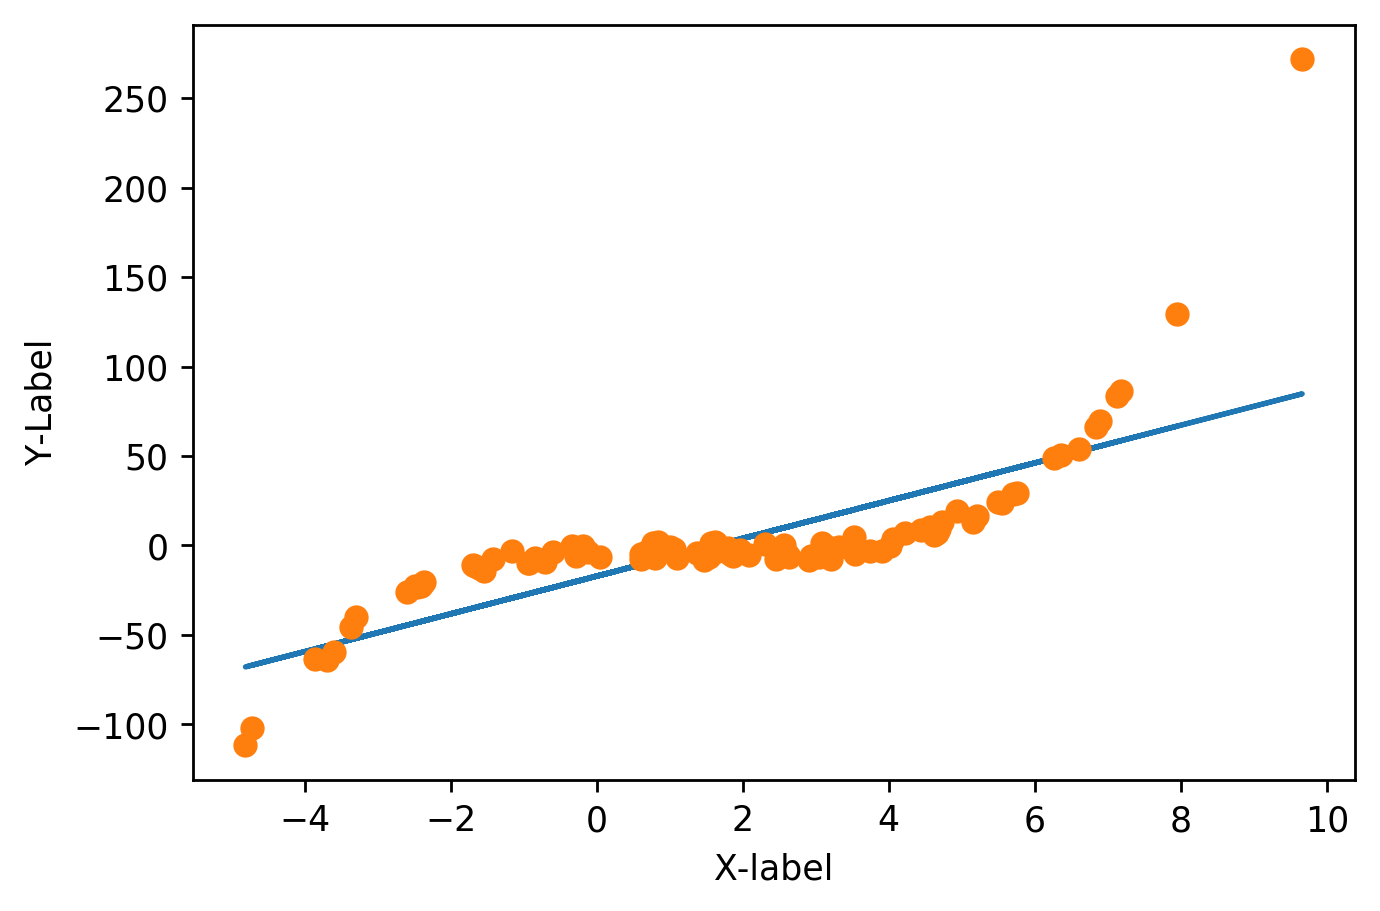

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

P = model(X_Set, *params)  

fig = plt.figure(dpi=250)
plt.xlabel("X-label")
plt.ylabel("Y-Label")
plt.plot(X_Set.numpy(), P.detach().numpy()) 
plt.plot(X_Set.numpy(), Y_Set.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")

